#  Marilyn:  Loaded the necessary libraries needed for data mining

In [ ]:
# Data handling
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans, DBSCAN  # for clustering (if needed)

# Model evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Association rules (optional, if you're doing market basket analysis)
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder


In [11]:
df = pd.read_csv("data/transformed/transformed_cybersecurity_intrusion_data.csv")
df.head()

,usession_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,SID_00003,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,SID_00004,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,SID_00005,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


#### Marilyn:   Inspecting the data making sure it is ready for data modeling and other data mining techniques

In [15]:
df.columns
print(df.isnull().sum())
print(df.shape)
df.head(2)

usession_id               0
network_packet_size       0
protocol_type             0
login_attempts            0
session_duration          0
encryption_used        1966
ip_reputation_score       0
failed_logins             0
browser_type              0
unusual_time_access       0
attack_detected           0
dtype: int64
(9537, 11)


,usession_id,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,SID_00001,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,SID_00002,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0


In [16]:
df_new=df.copy()
df_new = df_new.drop(columns=["usession_id"])
#replacing N/A values with None
df_new["encryption_used"]=df_new["encryption_used"].fillna("None")
df_new.isnull().sum()


network_packet_size    0
protocol_type          0
login_attempts         0
session_duration       0
encryption_used        0
ip_reputation_score    0
failed_logins          0
browser_type           0
unusual_time_access    0
attack_detected        0
dtype: int64

In [17]:
df_new.dtypes
df_new.head()



,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access,attack_detected
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0,1
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0,0
2,629,TCP,3,75.044262,DES,0.739164,2,Chrome,0,1
3,804,UDP,4,601.248835,DES,0.123267,0,Unknown,0,1
4,453,TCP,5,532.540888,AES,0.054874,1,Firefox,0,0


## 1. Marilyn Supervised Learning Techniques

### Marilyn: Preprocessing the data for  modeling

#### Marilyn: separating the data into features and target variables

In [18]:
X = df_new.drop("attack_detected", axis=1)
y = df_new["attack_detected"]
print(X.columns)
X.head(2)



Index(['network_packet_size', 'protocol_type', 'login_attempts',
       'session_duration', 'encryption_used', 'ip_reputation_score',
       'failed_logins', 'browser_type', 'unusual_time_access'],
      dtype='object')


,network_packet_size,protocol_type,login_attempts,session_duration,encryption_used,ip_reputation_score,failed_logins,browser_type,unusual_time_access
0,599,TCP,4,492.983263,DES,0.606818,1,Edge,0
1,472,TCP,3,1557.996461,DES,0.301569,0,Firefox,0


In [19]:
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type', 'unusual_time_access']

# Encoding categorical columns using Label Encoding
le = LabelEncoder()
for col in categorical_cols:
    X[col] = le.fit_transform(X[col])

#scaling numerical features 
numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

### Marilyn: Splitting the data into training and testing sets

In [20]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

### Marilyn: Modeling Using Logistic Regression

In [21]:

log_model = LogisticRegression()
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)



### Marilyn : Modeling Using Decision Tree Classifier

In [22]:
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)
tree_pred = tree_model.predict(X_test)

### Marilyn : Modeling Using the Random forest classfier Classifier

In [23]:
# 3. Random Forest
forest_model = RandomForestClassifier()
forest_model.fit(X_train, y_train)
forest_pred = forest_model.predict(X_test)


#### Marilyn: Model Evaluation

In [24]:
# Evaluation Function
def evaluate_model(name, y_true, y_pred):
    print(f"=== {name} ===")
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print(classification_report(y_true, y_pred))
    print("-" * 40)

# Comparing the Results
evaluate_model("Logistic Regression", y_test, log_pred)
evaluate_model("Decision Tree", y_test, tree_pred)
evaluate_model("Random Forest", y_test, forest_pred)

=== Logistic Regression ===
Accuracy: 0.7285115303983228
              precision    recall  f1-score   support

           0       0.74      0.79      0.76      1055
           1       0.71      0.66      0.68       853

    accuracy                           0.73      1908
   macro avg       0.73      0.72      0.72      1908
weighted avg       0.73      0.73      0.73      1908

----------------------------------------
=== Decision Tree ===
Accuracy: 0.8207547169811321
              precision    recall  f1-score   support

           0       0.83      0.85      0.84      1055
           1       0.81      0.79      0.80       853

    accuracy                           0.82      1908
   macro avg       0.82      0.82      0.82      1908
weighted avg       0.82      0.82      0.82      1908

----------------------------------------
=== Random Forest ===
Accuracy: 0.8836477987421384
              precision    recall  f1-score   support

           0       0.83      0.99      0.90      1

In [25]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Dictionary to store scores
model_scores = {}

models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    model_scores[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": report['1']['precision'],   # class 1 = attack
        "Recall": report['1']['recall'],
        "F1-Score": report['1']['f1-score']
    }


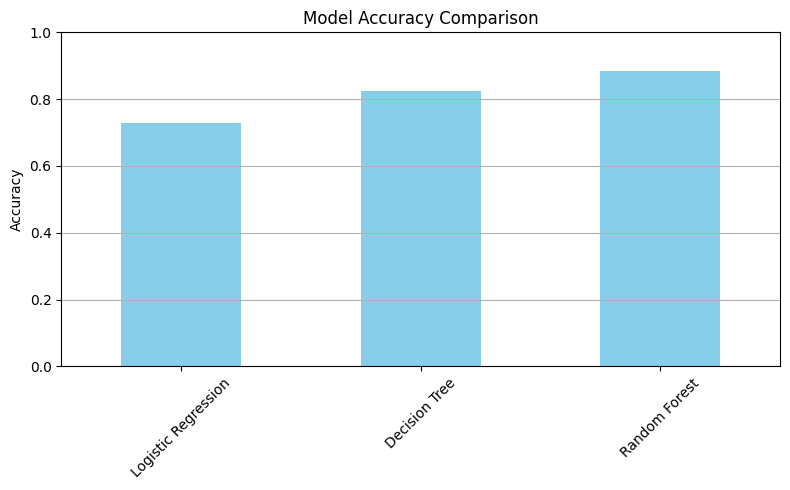

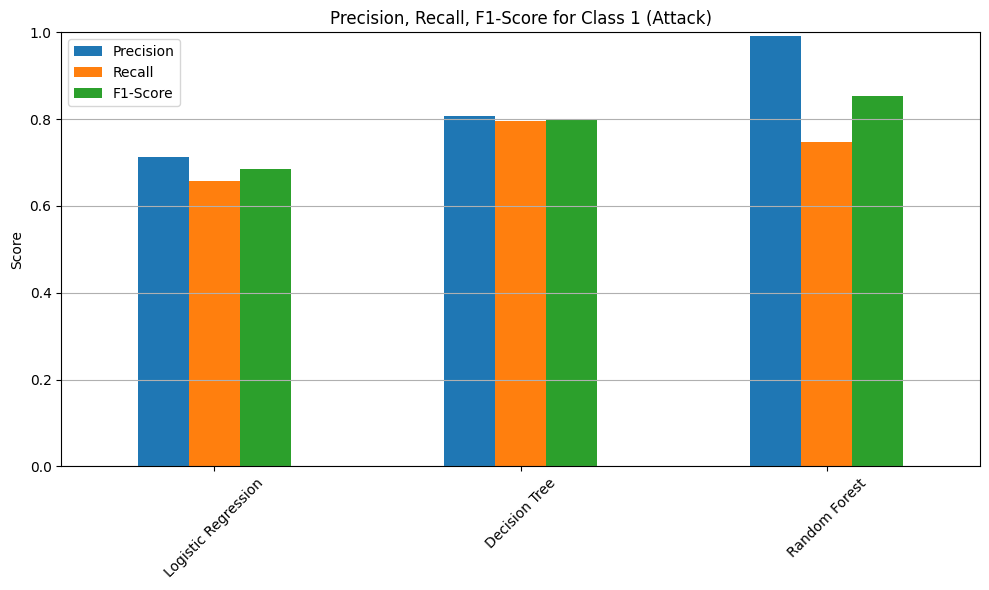

In [ ]:
# Convert to DataFrame for easier plotting
import pandas as pd

scores_df = pd.DataFrame(model_scores).T  # Transpose for plotting

# Plot Accuracy
scores_df['Accuracy'].plot(kind='bar', figsize=(8, 5), color='skyblue')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Plot Precision, Recall, F1-Score
scores_df[['Precision', 'Recall', 'F1-Score']].plot(kind='bar', figsize=(10, 6))
plt.title("Precision, Recall, F1-Score for Class 1 (Attack)")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{title} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Plot for each model
for name, model in models.items():
    y_pred = model.predict(X_test)
    plot_confusion_matrix(y_test, y_pred, name)


### Best Model to Use: RANDOM FOREST
- Perfect precision (1.00) for attacks → Every predicted attack was indeed an attack.

- Recall (0.75) is higher than Logistic Regression and close to Decision Tree (0.80), but the F1-score (0.85) is significantly higher, which means better balance.

- Highest accuracy (0.89) overall.

## 2. UNSUPERVISED LEARNING TECHNIQUES

##### KMean clustering

#### Marilyn : Using the elbow method to determine the optimal number of clusters

In [30]:
# Step 1: Copy and remove the target variable
X_cluster = df.drop(columns=['attack_detected', 'usession_id'])  # session_id is not useful

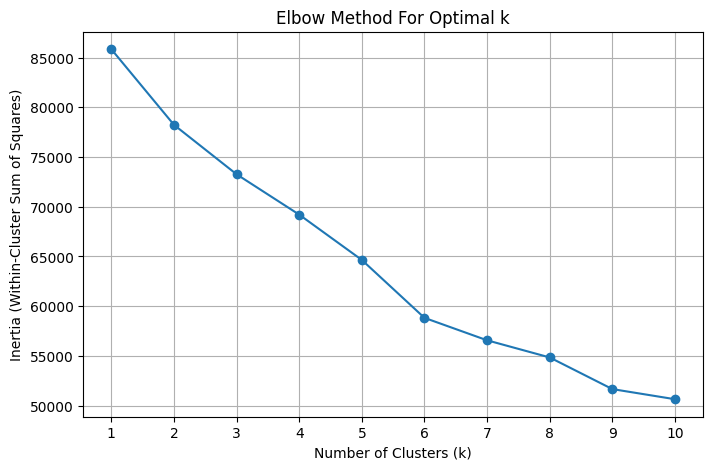

In [31]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Optional: Encode categorical variables if not already encoded
from sklearn.preprocessing import LabelEncoder
categorical_cols = ['protocol_type', 'encryption_used', 'browser_type', 'unusual_time_access']
le = LabelEncoder()
for col in categorical_cols:
    X_cluster[col] = le.fit_transform(X_cluster[col])

# Optional: Scale numerical features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

# Step 2: Run KMeans for a range of k values
inertia = []
k_range = range(1, 11)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)

# Step 3: Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method For Optimal k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia (Within-Cluster Sum of Squares)")
plt.xticks(k_range)
plt.grid(True)
plt.show()


- From the graph above the most suitable number of clusters will be 4 becuase the rate of decrease in inertia starts to flatten — meaning you’re capturing most of the natural structure in the data without overfitting.

In [32]:
# Set number of clusters
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(X_scaled)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [37]:
# Add cluster labels to your original dataframe
df_new['cluster'] = kmeans.labels_
print(df_new.head(2))


   network_packet_size protocol_type  login_attempts  session_duration  \
0                  599           TCP               4        492.983263   
1                  472           TCP               3       1557.996461   

  encryption_used  ip_reputation_score  failed_logins browser_type  \
0             DES             0.606818              1         Edge   
1             DES             0.301569              0      Firefox   

   unusual_time_access  attack_detected  cluster  
0                    0                1        3  
1                    0                0        0  


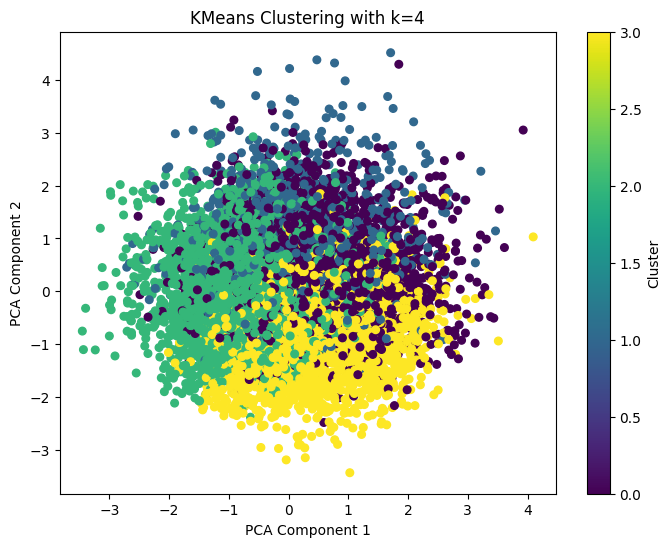

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce dimensions to 2 for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis', s=30)
plt.title("KMeans Clustering with k=4")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label='Cluster')
plt.show()


In [35]:
comparison=pd.crosstab(df_new['cluster'], df_new['attack_detected'])
print(comparison)


attack_detected     0     1
cluster                    
0                1315  1089
1                 586   539
2                2272   988
3                1100  1648


In [38]:
df_new.groupby('cluster').mean(numeric_only=True)


,network_packet_size,login_attempts,session_duration,ip_reputation_score,failed_logins,unusual_time_access,attack_detected
cluster,,,,,,,
0,513.586106,3.846506,615.404513,0.312894,1.498752,0.144759,0.452995
1,518.651556,4.000000,2412.802447,0.315029,1.648889,0.193778,0.479111
2,528.619939,3.230368,540.161031,0.241669,1.469325,0.155215,0.303067
3,448.021106,5.158661,584.298352,0.460526,1.538210,0.130277,0.599709


<Axes: xlabel='cluster'>

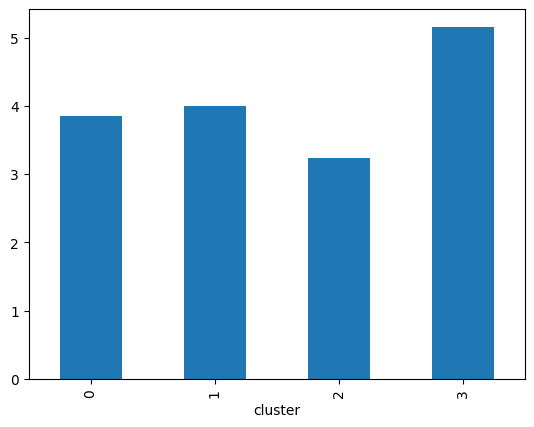

In [39]:
df_new.groupby('cluster')['login_attempts'].mean().plot(kind='bar')


##### from the chart above we see cluster 3 has the highest login attempts and so should be flagged as such. 

#### DBSCAN: Density-Based Spatial Clustering of Applications with Noise
- DBSCAN forms clusters based on the density of data points and automatically detects outliers (called noise)

In [40]:
N = df_new[['network_packet_size', 'login_attempts', 'session_duration',
            'ip_reputation_score', 'failed_logins', 'unusual_time_access']]

scaler = StandardScaler()
N_scaled = scaler.fit_transform(X)

In [42]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
db_labels = dbscan.fit_predict(X_scaled)

df_new['dbscan_cluster'] = db_labels

# How many noise points?
df_new['dbscan_cluster'].value_counts()

# Compare outliers with attack labels
df_new.groupby('dbscan_cluster')['attack_detected'].mean()



dbscan_cluster
-1     0.455408
 0     0.000000
 1     0.187500
 2     0.142857
 3     0.217391
 4     0.125000
 5     0.153846
 6     0.090909
 7     0.166667
 8     0.142857
 9     0.105263
 10    0.166667
 11    0.272727
 12    0.142857
 13    0.000000
 14    0.200000
 15    0.250000
 16    0.200000
 17    0.285714
 18    0.250000
 19    0.142857
 20    0.200000
 21    0.272727
 22    0.000000
 23    0.000000
 24    0.000000
 25    0.000000
 26    0.000000
 27    0.400000
 28    0.400000
 29    0.166667
 30    0.200000
 31    0.000000
Name: attack_detected, dtype: float64

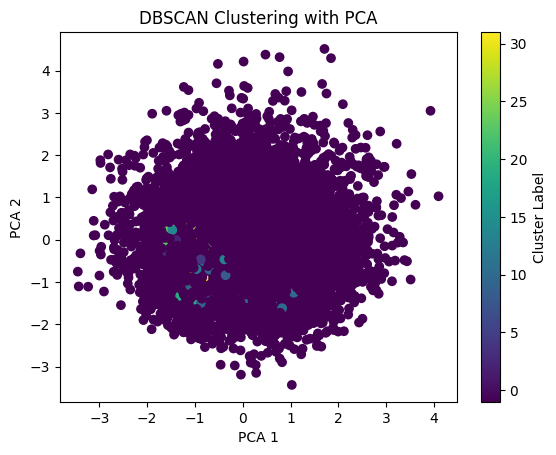

In [43]:


pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.scatter(X_pca[:, 0], X_pca[:, 1], c=db_labels, cmap='viridis')
plt.title("DBSCAN Clustering with PCA")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.colorbar(label='Cluster Label')
plt.show()
